Matching Strings by Similarity using Levenshtein Distance

In [1]:
import itertools
import pandas as pd
from thefuzz import fuzz, process

In [2]:
df1 = pd.read_csv('../Data/companies_1.csv')
df2 = pd.read_csv('../Data/companies_2.csv')
df1.rename(columns = {'CLIENT': 'CSV 1'}, inplace = True)
df2.rename(columns = {'Firm Name': 'CSV 2'}, inplace = True)
df1 = df1.sort_values(by = 'CSV 1', ascending = True).reset_index(drop = True)
df2 = df2.sort_values(by = 'CSV 2', ascending = True).reset_index(drop = True)

In [5]:
sim_companies = []
for c1 in df1['CSV 1']:
    for c2 in df2['CSV 2']:
        sim_ratio = fuzz.ratio(c1, c2)
        if sim_ratio > 80:
            sim_companies.append((c1, c2))

In [8]:
sim_companies

[('Adidas America, Inc.', 'Adidas America, Inc.'),
 ('Adobe Systems, Inc.', 'Adobe Systems Inc'),
 ('Advanced Micro Devices, Inc.', 'Advanced Micro Devices, Inc.'),
 ('Advanced Micro Devices, Inc.', 'Advanced Micro Devices, Incorporated'),
 ('Adventist Health', 'Adventist Health'),
 ('Aerojet Rocketdyne Holdings (GenCorp)',
  'Aerojet Rocketdyne Holdings, Inc.'),
 ('Alameda-Contra Costa Transit District',
  'Alameda-Contra Costa Transit District'),
 ('Alaska Community Foundation', 'Alaska Community Foundation'),
 ('Alaska Retirement Management Board', 'Alaska Retirement Management Board'),
 ('Alexander & Baldwin, Inc.', 'Alexander & Baldwin, Inc.'),
 ('Alexander & Baldwin, Inc.', 'Alexander & Baldwin, Incorporated'),
 ('Allergan, Inc.', 'Allergan, Inc.'),
 ('Alphabet Inc.', 'Alphabet Inc.'),
 ('Amazon Web Services, Inc.', 'Amazon Web Services, Inc.'),
 ('Amazon Web Services, Inc.', 'Amazon Web Services, Incorporated'),
 ('Cisco Systems, Inc.', 'Cisco Systems, Inc.'),
 ('Dropbox, Inc.',

In [14]:
#Itertools Product Method
combinations = list(itertools.product(df1['CSV 1'], df2['CSV 2']))

In [25]:
sim_companies = []
for c1, c2 in combinations:
    sim_ratio = fuzz.ratio(c1, c2)
    if sim_ratio > 75:
        sim_companies.append((c1, c2))
sim_companies

[('Adidas America, Inc.', 'Adidas America, Inc.'),
 ('Adobe Systems, Inc.', 'Adobe Systems Inc'),
 ('Adobe Systems, Inc.', 'Cisco Systems, Inc.'),
 ('Advanced Micro Devices, Inc.', 'Advanced Micro Devices, Inc.'),
 ('Advanced Micro Devices, Inc.', 'Advanced Micro Devices, Incorporated'),
 ('Adventist Health', 'Adventist Health'),
 ('Aerojet Rocketdyne Holdings (GenCorp)',
  'Aerojet Rocketdyne Holdings, Inc.'),
 ('Alameda-Contra Costa Transit District',
  'Alameda-Contra Costa Transit District'),
 ('Alaska Community Foundation', 'Alaska Community Foundation'),
 ('Alaska Retirement Management Board', 'Alaska Retirement Management Board'),
 ('Alexander & Baldwin, Inc.', 'Alexander & Baldwin, Inc.'),
 ('Alexander & Baldwin, Inc.', 'Alexander & Baldwin, Incorporated'),
 ('Allergan, Inc.', 'Allergan, Inc.'),
 ('Alphabet Inc.', 'Alphabet Inc.'),
 ('Amazon Web Services, Inc.', 'Amazon Web Services, Inc.'),
 ('Amazon Web Services, Inc.', 'Amazon Web Services, Incorporated'),
 ('Cisco Systems, 

In [31]:
df = pd.DataFrame(itertools.product(df1['CSV 1'], df2['CSV 2']), columns = ['CSV 1', 'CSV 2'])

In [32]:
df.head()

,CSV 1,CSV 2
0,AECOM,AECOM Technology Corporation
1,AECOM,"Adidas America, Inc."
2,AECOM,Adobe Systems Inc
3,AECOM,"Advanced Micro Devices, Inc."
4,AECOM,"Advanced Micro Devices, Incorporated"


In [33]:
#Calculating the Levenshtein Distance
fuzz.partial_ratio('Apple Inc.', 'Apple')

100

In [34]:
fuzz.partial_ratio('Apple Inc.', 'Microsoft Inc.')

67

In [37]:
df['Ratio Score'] = df.apply(lambda row: fuzz.partial_ratio(row['CSV 1'], row['CSV 2']), axis = 1)

In [42]:
df.sample(10)

,CSV 1,CSV 2,Ratio Score
598,Atlassian Corporation Plc,Microsoft Corporation,65
761,"DoorDash, Inc.",Intel Corporation,42
1375,Spotify Technology S.A.,"Facebook, Inc.",37
424,"Allergan, Inc.",Alphabet Incorporated,54
1370,Spotify Technology S.A.,Apple Incorporated,29
608,Atlassian Corporation Plc,Snap Incorporated,53
407,"Alexander & Baldwin, Inc.",Uber Technologies Inc.,50
453,Alphabet Inc.,Adobe Systems Inc,50
178,Adventist Health,Alphabet Incorporated,32
1262,Shopify Inc.,"Salesforce.com, Incorporated",42


In [58]:
df.loc[(df['Ratio Score'] > 90)].sample(10)

,CSV 1,CSV 2,Ratio Score
42,"Adidas America, Inc.","Adidas America, Inc.",100
633,"Cisco Systems, Inc.","Cisco Systems, Inc.",100
1513,"Twitter, Inc.","Twitter, Incorporated",96
1178,"Reddit, Inc.","Reddit, Incorporated",96
0,AECOM,AECOM Technology Corporation,100
507,"Amazon Web Services, Inc.","Amazon Web Services, Inc.",100
1135,"Pinterest, Inc.","Pinterest, Incorporated",97
1512,"Twitter, Inc.","Twitter, Inc.",100
379,"Alexander & Baldwin, Inc.","Alexander & Baldwin, Inc.",100
1555,"Uber Technologies, Inc.",Uber Technologies Inc.,95


In [62]:
df.loc[(df['Ratio Score'] >= 90) & (df['CSV 1'] != df['CSV 2'])].shape

(17, 3)

In [63]:
df.loc[(df['Ratio Score'] >= 90) & (df['CSV 1'] != df['CSV 2'])]

,CSV 1,CSV 2,Ratio Score
0,AECOM,AECOM Technology Corporation,100
84,"Adobe Systems, Inc.",Adobe Systems Inc,94
127,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Incorporated",98
211,Aerojet Rocketdyne Holdings (GenCorp),"Aerojet Rocketdyne Holdings, Inc.",92
380,"Alexander & Baldwin, Inc.","Alexander & Baldwin, Incorporated",98
465,Alphabet Inc.,Alphabet Incorporated,96
508,"Amazon Web Services, Inc.","Amazon Web Services, Incorporated",98
550,Apple Inc.,Apple Incorporated,95
634,"Cisco Systems, Inc.","Cisco Systems, Incorporated",97
800,"Dropbox, Inc.","Dropbox, Incorporated",96


<Axes: ylabel='Frequency'>

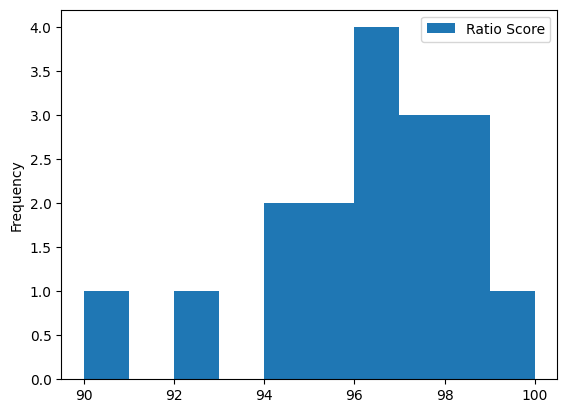

In [65]:
df.loc[(df['Ratio Score'] >= 90) & (df['CSV 1'] != df['CSV 2'])].plot(kind = 'hist')

<Axes: >

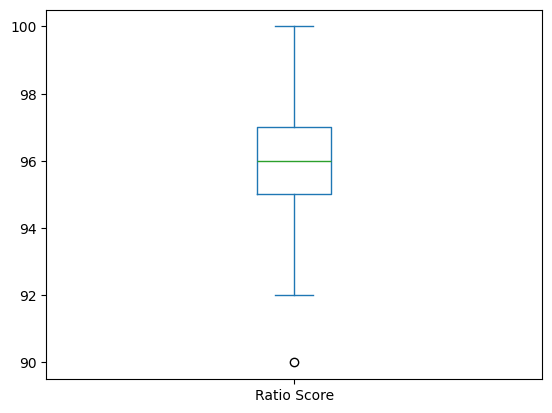

In [66]:
df.loc[(df['Ratio Score'] >= 90) & (df['CSV 1'] != df['CSV 2'])].plot(kind = 'box')